In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_excel("Data_Train.xlsx", sheet_name="Sheet1")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
36h 25m      1
30h 10m      1
35h 35m      1
37h 10m      1
19h 50m      1
Name: Duration, Length: 368, dtype: int64

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int64

In [23]:
df["Journey_date"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format= "%d/%m/%Y").dt.month

In [27]:
df.drop("Date_of_Journey",inplace=True, axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [33]:
df["dep_hr"] = pd.to_datetime(df.Dep_Time).dt.hour
df["dep_min"] = pd.to_datetime(df.Dep_Time).dt.minute
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [34]:

df.drop("Dep_Time",inplace=True, axis=1)

In [35]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [40]:

df["arrival_hr"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [41]:
df.drop("Arrival_Time",inplace= True, axis=1)

In [42]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [91]:
duration = list(df.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = "0h " + duration[i].strip()
            
duration_hr = []
duration_min = []
for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep='h')[0]))
    duration_min.append( int(duration[i].split(sep='m')[0].split()[1]) )   

In [93]:
df["duration_hr"] = duration_hr
df["duration_min"] = duration_min   
df.drop('Duration',inplace= True, axis = 1)
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [102]:
stop = []
for i in list(df["Total_Stops"]):
    if i.split()[0] =='non-stop':
        stop.append( int(0) )
    else:
        stop.append(int(i.split()[0]))
df['stops'] = stop
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hr,duration_min,stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,1


In [104]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

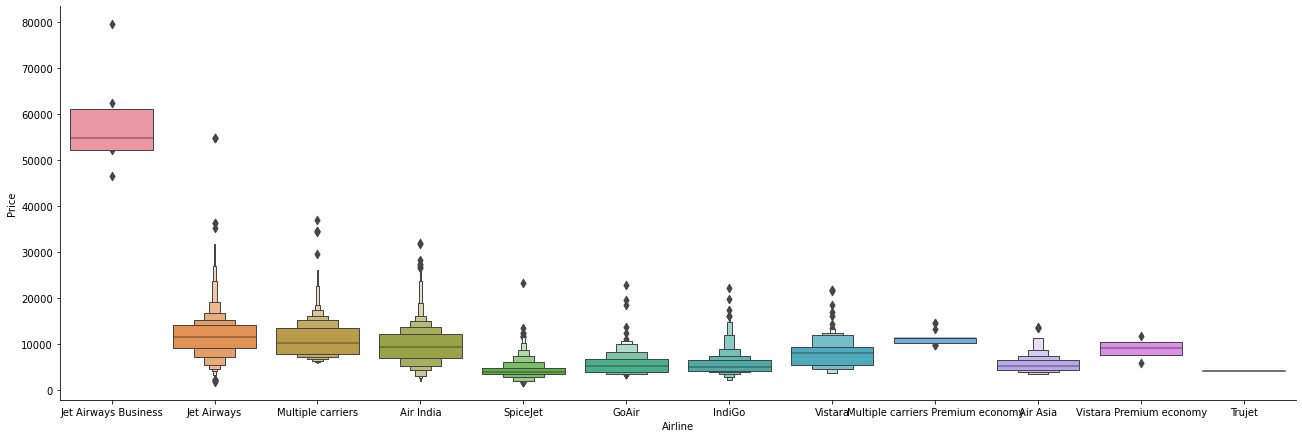

In [110]:
sns.catplot(x = 'Airline', y = 'Price', data= df.sort_values('Price',ascending=False), 
            kind='boxen', height=6, aspect=3)
plt.show()

In [133]:
# nominal data we will perfron onehotencoding
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
print(Airline.head())


   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                     

In [112]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

[]

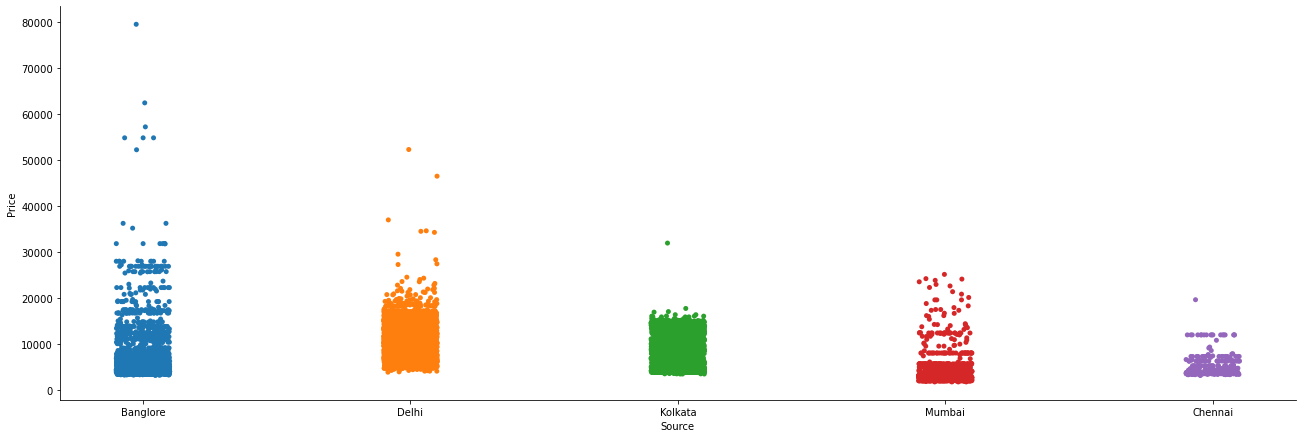

In [113]:
sns.catplot(x= 'Source', y='Price', data = df.sort_values('Price',ascending = False),
           height= 6, aspect=3)
plt.plot()

In [114]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [115]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [121]:
Destination = df.Destination
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [122]:
df.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [123]:
df.drop(["Route","Additional_Info"],inplace=True, axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hr,duration_min,stops
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45,1


In [124]:
df.drop(['stops'],inplace=True, axis=1)

In [125]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [128]:
df.replace({'non-stop':0, '1 stop':1, '2 stops':2, "3 stops":3, "4 stops": 4}, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [129]:
data_train = pd.concat([df, Airline, Source, Destination], axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [130]:
data_train.drop(['Airline','Source','Destination'], axis=1, inplace=True)
data_train.head()

,Total_Stops,Price,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hr,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [131]:
data_train.shape

(10682, 30)

In [137]:
df = pd.read_excel('Test_set.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [138]:
#DATA PREPROCESSING FOR TEST DATA

df["Journey_date"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format= "%d/%m/%Y").dt.month
df.drop("Date_of_Journey",inplace=True, axis=1)
df["dep_hr"] = pd.to_datetime(df.Dep_Time).dt.hour
df["dep_min"] = pd.to_datetime(df.Dep_Time).dt.minute
df.drop("Dep_Time",inplace=True, axis=1)
df["arrival_hr"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'],inplace=True, axis=1)
duration = list(df.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = "0h " + duration[i].strip()
            
duration_hr = []
duration_min = []
for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep='h')[0]))
    duration_min.append( int(duration[i].split(sep='m')[0].split()[1]) )   
df["duration_hr"] = duration_hr
df["duration_min"] = duration_min   
df.drop('Duration',inplace= True, axis = 1)
stop = []
for i in list(df["Total_Stops"]):
    if i.split()[0] =='non-stop':
        stop.append( int(0) )
    else:
        stop.append(int(i.split()[0]))
df['stops'] = stop
# nominal data we will perfron onehotencoding
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
print(Airline.head())
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Destination = df.Destination
Destination = pd.get_dummies(Destination, drop_first=True)
df.drop(["Route","Additional_Info"],inplace=True, axis=1)
df.drop(['stops'],inplace=True, axis=1)
df.replace({'non-stop':0, '1 stop':1, '2 stops':2, "3 stops":3, "4 stops": 4}, inplace=True)
data_test = pd.concat([df, Airline, Source, Destination], axis=1)
data_test.drop(['Airline','Source','Destination'], axis=1, inplace=True)

data_test.head()

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               0                    1   
1                  0              0               1                    0   
2                  0              0               0                    1   
3                  0              0               0                    0   
4                  0              0               0                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          1   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                     

,Total_Stops,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hr,duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [142]:
data_test.head()

,Total_Stops,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hr,duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [143]:
data_test.head()

,Total_Stops,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hr,duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#feature 

In [144]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'dep_hr',
       'dep_min', 'arrival_hr', 'arrival_min', 'duration_hr', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [147]:
X = data_train.loc[:,['Total_Stops', 'Journey_date', 'Journey_month', 'dep_hr',
       'dep_min', 'arrival_hr', 'arrival_min', 'duration_hr', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]
X.head()

,Total_Stops,Journey_date,Journey_month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hr,duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [166]:
y = data_train.iloc[:,1]
type(y)

pandas.core.series.Series

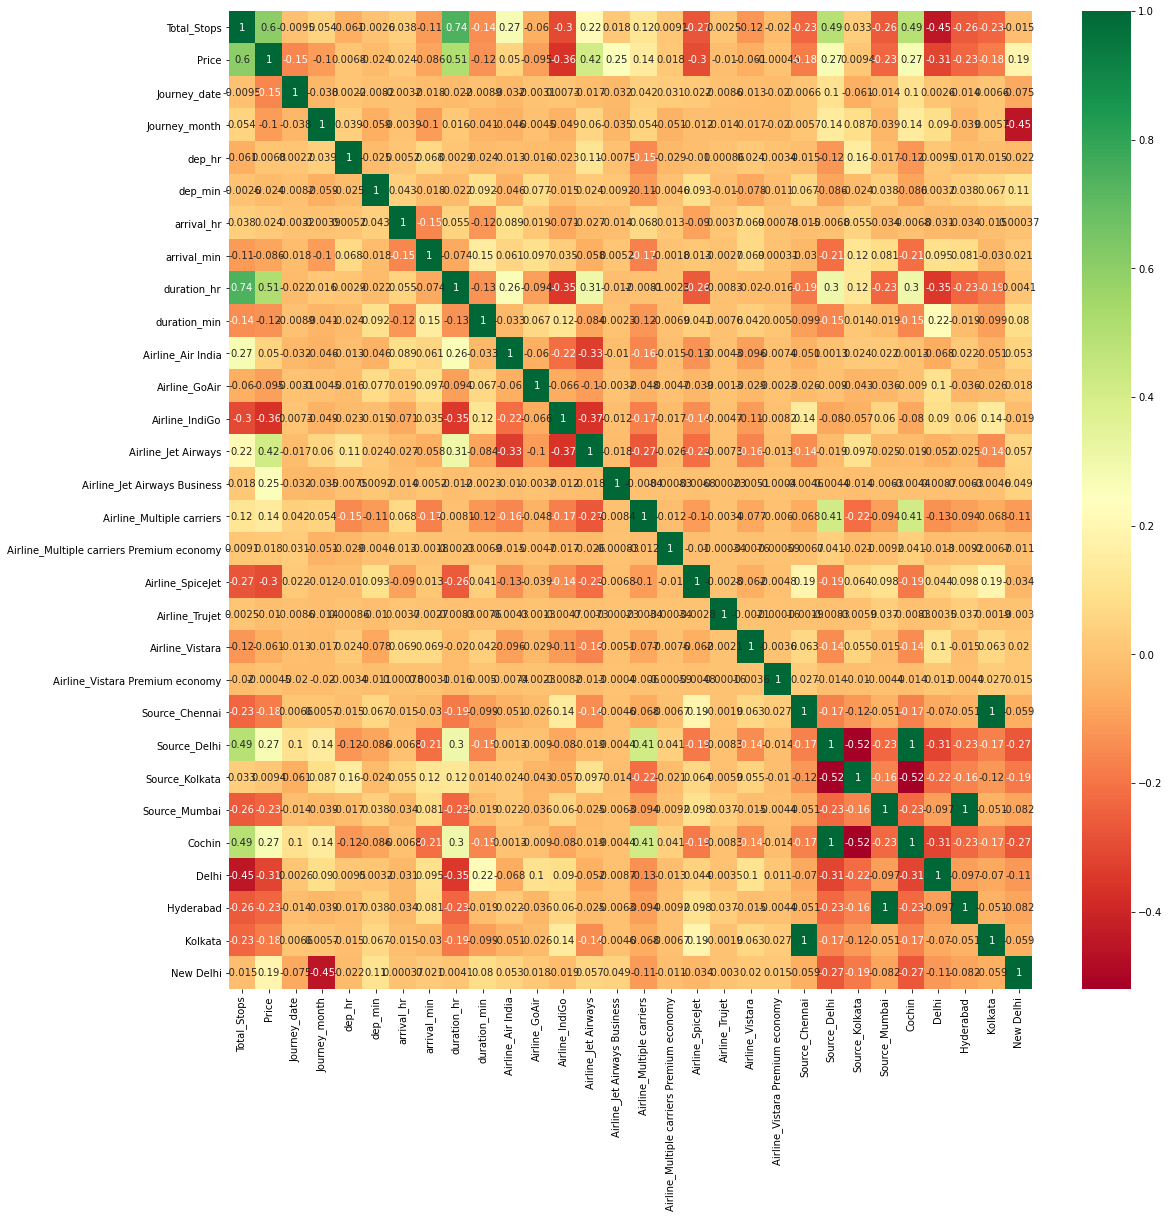

In [152]:
plt.figure( figsize=(18,18))
sns.heatmap(data_train.corr(),annot=True, cmap="RdYlGn")

plt.show()

In [167]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [168]:
print(selection.feature_importances_)

[2.29088508e-01 1.43277188e-01 5.43145118e-02 2.36224085e-02
 2.11481157e-02 2.92597400e-02 1.95726856e-02 1.01980782e-01
 1.75856172e-02 1.02928837e-02 1.68867984e-03 1.66817513e-02
 1.46904291e-01 6.74697200e-02 1.92412402e-02 9.09635320e-04
 2.94303546e-03 1.19954685e-04 5.17282025e-03 9.17589888e-05
 4.53026723e-04 1.24651159e-02 3.25328177e-03 7.25992132e-03
 1.02963013e-02 2.12118834e-02 8.21038199e-03 4.70856161e-04
 2.50139043e-02]


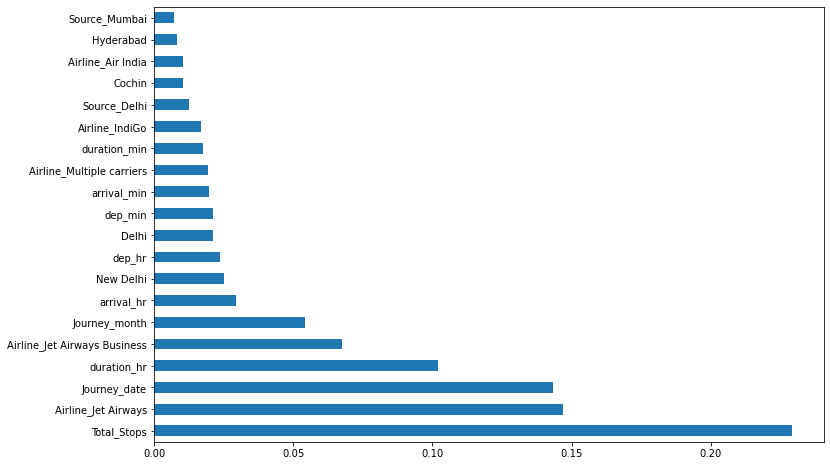

In [170]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y ,test_size= 0.2, random_state= 42)

In [173]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [174]:
predicted  = reg_rf.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted, y_test)

4369130.501580073

In [175]:
reg_rf.score(X_train, y_train)

0.9529623429178952

In [177]:
reg_rf.score(X_test, y_test)

0.7973694885174677

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


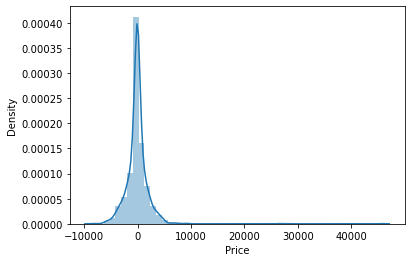

In [179]:
sns.distplot(y_test-predicted)
plt.show()

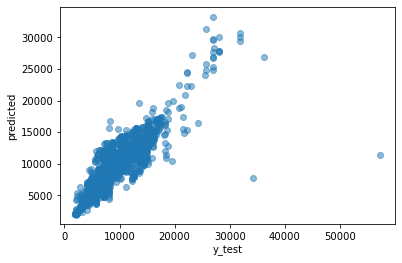

In [180]:
plt.scatter(y_test, predicted, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel('predicted')
plt.show()

In [181]:
from sklearn import metrics

In [183]:
print(" mean_absolute errror: ",metrics.mean_absolute_error(y_test,predicted))
print(" mean squared error: ", metrics.mean_squared_error(y_test,predicted))
print(" root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,predicted)))

 mean_absolute errror:  1178.7332119055359
 mean squared error:  4369130.501580073
 root mean squared error:  2090.246516940065


In [184]:
metrics.r2_score(y_test,predicted)

0.7973694885174677

In [185]:
#hyper parameter tuning

In [186]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [187]:
from sklearn.model_selection import RandomizedSearchCV

In [188]:
# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [191]:
rf_random = RandomizedSearchCV(estimator= reg_rf, param_distributions=random_grid,
                              scoring='neg_mean_squared_error',n_iter=10, cv = 5,
                               verbose=2, random_state=42, n_jobs = 1)

In [192]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [193]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [194]:
predictions = rf_random.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


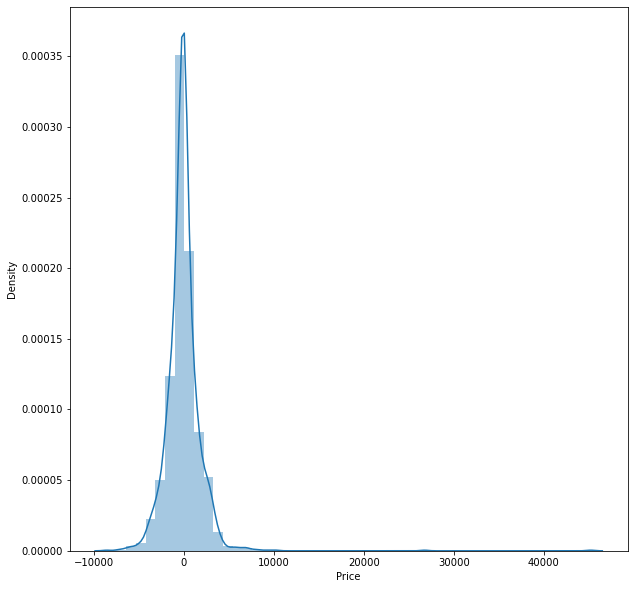

In [195]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-predictions)
plt.show()

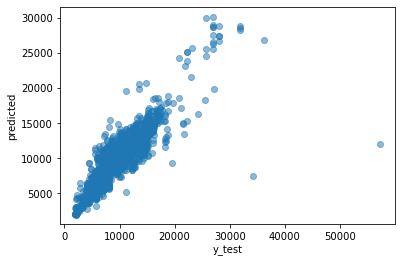

In [196]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel('predicted')
plt.show()

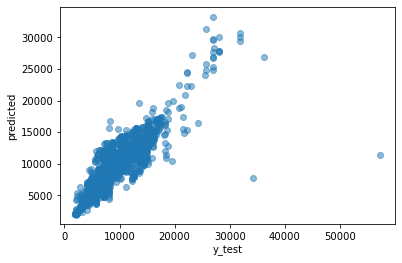

In [198]:
plt.scatter(y_test, predicted, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel('predicted')
plt.show()

In [197]:
print(" mean_absolute errror: ",metrics.mean_absolute_error(y_test,predicted))
print(" mean squared error: ", metrics.mean_squared_error(y_test,predicted))
print(" root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,predicted)))
print("\n\n")
print(" mean_absolute errror: ",metrics.mean_absolute_error(y_test,predictions))
print(" mean squared error: ", metrics.mean_squared_error(y_test,predictions))
print(" root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

 mean_absolute errror:  1178.7332119055359
 mean squared error:  4369130.501580073
 root mean squared error:  2090.246516940065



 mean_absolute errror:  1166.7808564553045
 mean squared error:  4067877.0777558903
 root mean squared error:  2016.8978848111994


In [199]:
#save the model

In [207]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [208]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [209]:
model_prediction = forest.predict(X_test)
mean_squared_error(model_prediction,y_test)

4067877.0777558903

In [213]:
print(metrics.r2_score( y_test,model_prediction))

0.8113409492768299
